In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_stopwords(df, col)
#        soon    possible
df = tp.remove_extra_spaces(df, col)
# soon possible
# '''

# features + spacyNLP + rating + tense + length + absolute_sentiment

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_stopwords(df, col)\n#        soon    possible\ndf = tp.remove_extra_spaces(df, col)\n# soon possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_test.shape

(193, 305)

========================= DecisionTree =========================
Elapsed Time: 57.3812 seconds
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)
Train Accuracy: 0.6328, F1: [0.6677 0.4715 0.6667 0.6736]
Test  Accuracy: 0.5699, F1: [0.6423 0.3226 0.5778 0.6186]


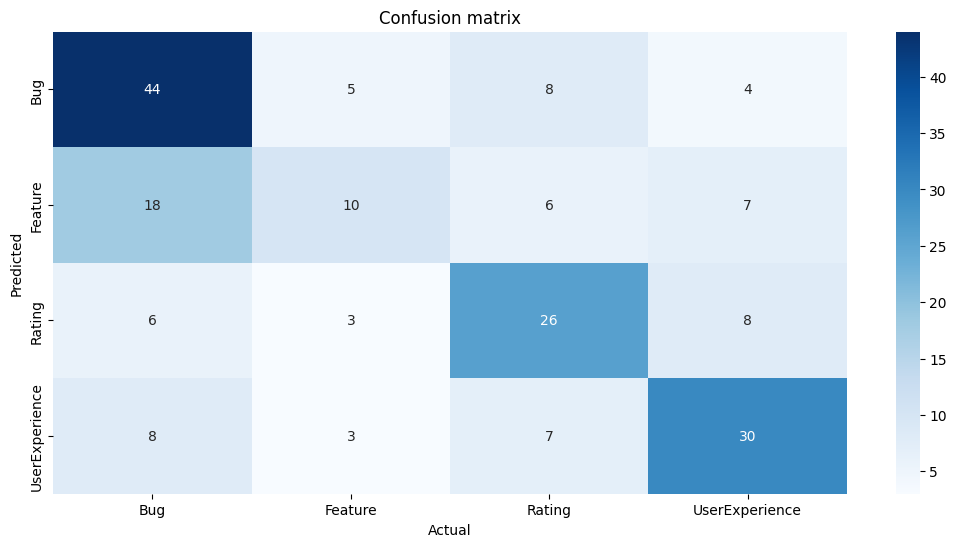

========================= LSVM =========================
Elapsed Time: 336.3892 seconds
LinearSVC(C=0.1, dual=False, penalty='l1')
Train Accuracy: 0.793, F1: [0.7812 0.6782 0.8354 0.8426]
Test  Accuracy: 0.6425, F1: [0.7402 0.5753 0.5412 0.6535]


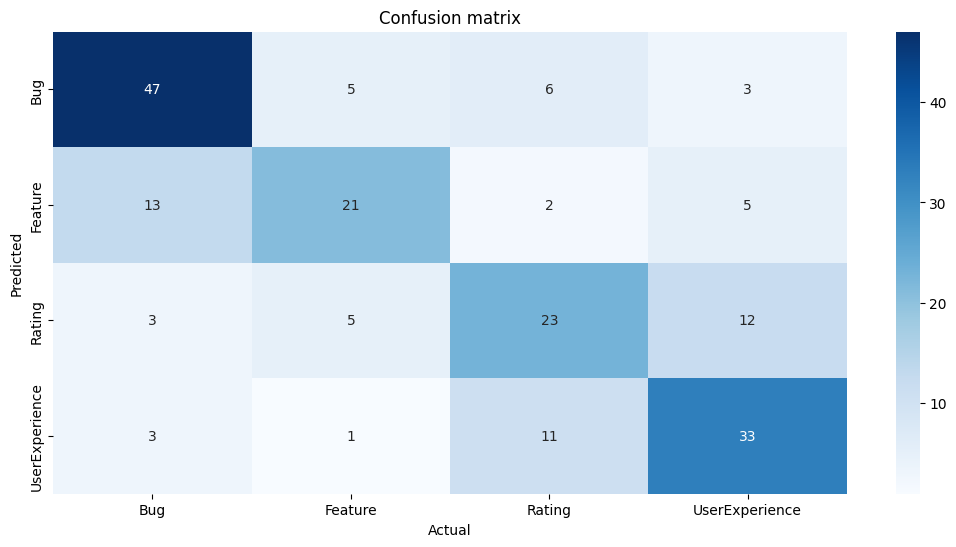

========================= RandomForest =========================
Elapsed Time: 161.9122 seconds
RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=800)
Train Accuracy: 0.9918, F1: [0.9916 0.9978 0.9896 0.9892]
Test  Accuracy: 0.6166, F1: [0.6809 0.3333 0.5882 0.6981]


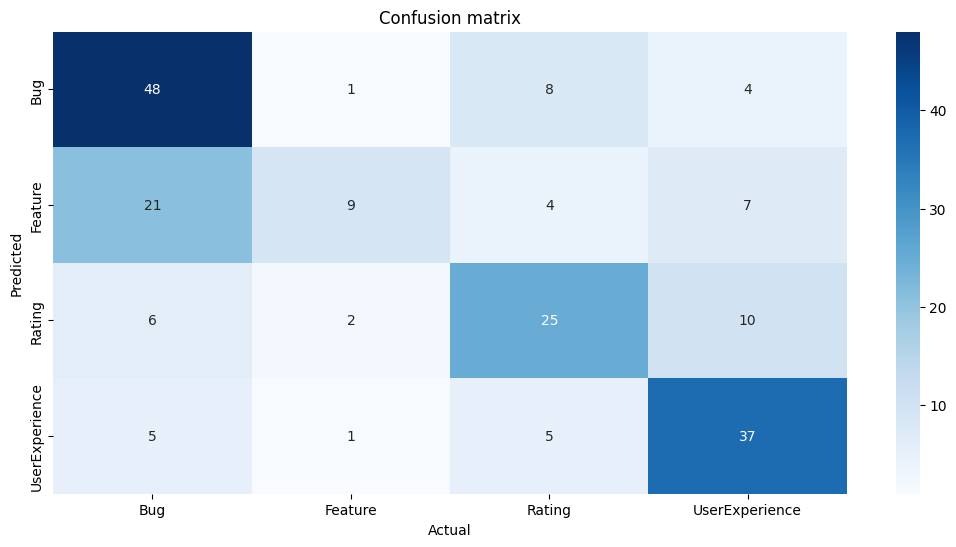

========================= AdaBoost =========================
Elapsed Time: 78.9131 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.1)
Train Accuracy: 0.9991, F1: [0.9983 1.     1.     0.9982]
Test  Accuracy: 0.6166, F1: [0.6721 0.4    0.6047 0.7037]


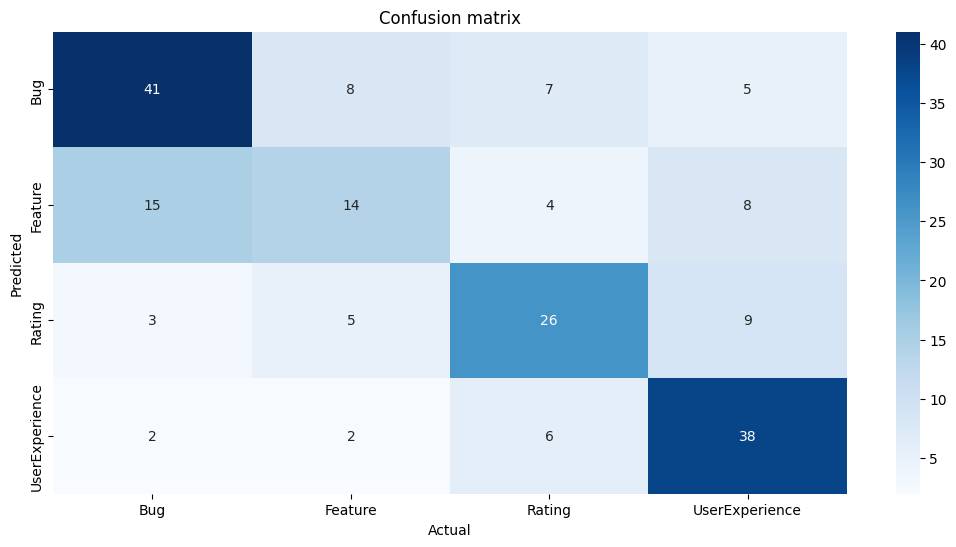

========================= XGBoost =========================
Elapsed Time: 336.6792 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8490723685850999, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.09888224459018413, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.09312391940476042, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=149, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.9991, F1: [0.9983 1.     1.     0.9982]
Test  Accuracy: 0.5907, F1: [0.6357 0.3939 0.5934 0.66  ]


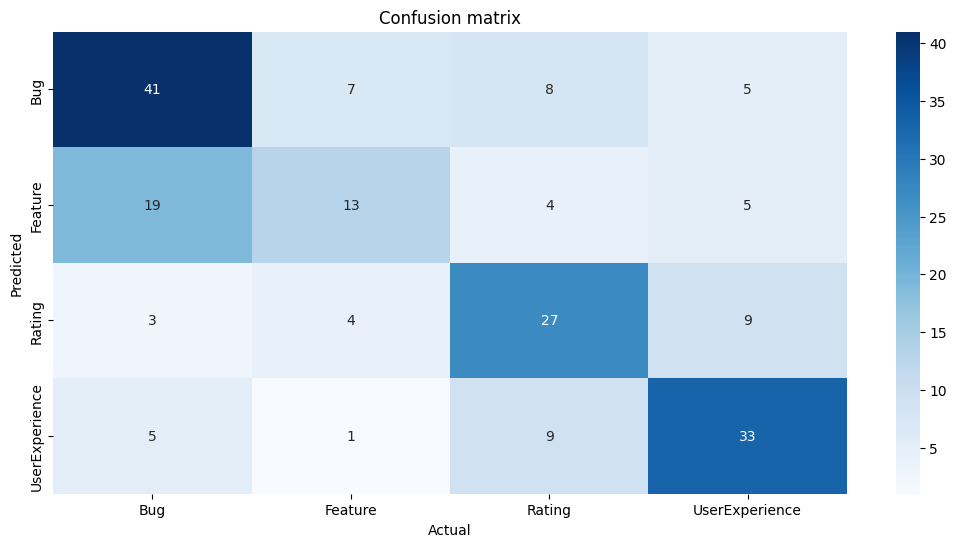

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)